In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
img_count = len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [7]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

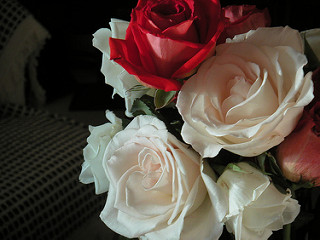

In [8]:
PIL.Image.open(str(roses[1]))

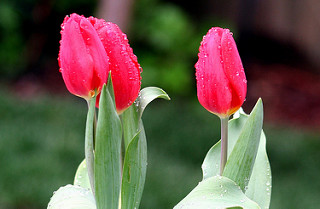

In [9]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_img_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

In [11]:
flowers_labels_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4
}

In [12]:
flowers_img_dict["roses"][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
img = cv2.imread(str(flowers_img_dict["roses"][0]))
img.shape

(240, 179, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_img_dict.items():
    for img in images:
        img = cv2.imread(str(img))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [18]:
num_classes = 5

In [19]:
model = Sequential([
    ly.Conv2D(16, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Conv2D(32, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Conv2D(64, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Flatten(),
    ly.Dense(128, activation="relu"),
    ly.Dense(num_classes)
])

model.compile(optimizer="adam",
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

his = model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 83ms/step - loss: 1.5515 - accuracy: 0.3663
Epoch 2/30
86/86 [==============================] - 4s 47ms/step - loss: 1.0909 - accuracy: 0.5585
Epoch 3/30
86/86 [==============================] - 4s 47ms/step - loss: 0.8614 - accuracy: 0.6672
Epoch 4/30
86/86 [==============================] - 4s 48ms/step - loss: 0.6709 - accuracy: 0.7638
Epoch 5/30
86/86 [==============================] - 4s 47ms/step - loss: 0.4796 - accuracy: 0.8238
Epoch 6/30
86/86 [==============================] - 4s 47ms/step - loss: 0.3181 - accuracy: 0.8932
Epoch 7/30
86/86 [==============================] - 4s 47ms/step - loss: 0.1683 - accuracy: 0.9480
Epoch 8/30
86/86 [==============================] - 4s 47ms/step - loss: 0.1041 - accuracy: 0.9727
Epoch 9/30
86/86 [==============================] - 4s 48ms/step - loss: 0.0734 - accuracy: 0.9807
Epoch 10/30
86/86 [==============================] - 4s 49ms/step - loss: 0.0544 - accuracy: 0.9855
Epoch 11/

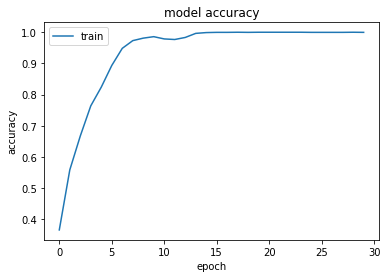

In [21]:
plt.plot(his.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [22]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 31ms/step - loss: 2.6670 - accuracy: 0.6394


[2.667001724243164, 0.6394335627555847]

In [23]:
preds = model.predict(X_test_scaled)
preds

array([[  4.648038  ,  27.054085  ,  -2.858853  , -21.036127  ,
         -1.9719232 ],
       [  5.793362  ,   5.0524826 ,  -3.5402222 ,  -2.7148209 ,
          7.516587  ],
       [ -4.6914124 ,  -0.76690763,  17.095636  , -11.976585  ,
         -4.194332  ],
       ...,
       [  1.9463437 ,  -3.4778562 , -12.24972   ,   1.2380732 ,
          6.9550724 ],
       [  2.0760357 ,   1.2388344 ,  -3.6451085 ,   3.3768826 ,
         -0.96888196],
       [  0.90595216, -10.731232  ,  -3.1169589 ,   1.9603935 ,
          3.309363  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(preds[0])
np.argmax(score)

1

In [25]:
y_test[0]

1

### Improving Test Accuracy Using Data Augumentation

In [43]:
data_aug = keras.Sequential([
    ly.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    ly.experimental.preprocessing.RandomRotation(0.1),
    ly.experimental.preprocessing.RandomZoom(0.1)
])

In [44]:
# !pip install tensorflow-gpu
# import tensorflow as tf
print(tf.__version__)

2.3.0


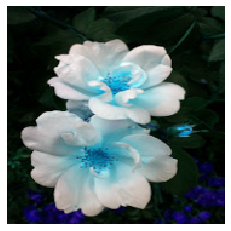

In [45]:
plt.axis("off")
plt.imshow(X[0])

In [47]:
# plt.axis("off")
# plt.imshow(data_aug(X)[0].numpy().astype("unit8"))

In [48]:
num_classes = 5

model = Sequential([
    data_aug,
    ly.Conv2D(16, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Conv2D(32, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Conv2D(64, 3, padding="same", activation="relu"),
    ly.MaxPooling2D(),
    ly.Dropout(0.2),
    ly.Flatten(),
    ly.Dense(128, activation="relu"),
    ly.Dense(num_classes)
])

model.compile(optimizer="adam",
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

his = model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 83ms/step - loss: 1.3842 - accuracy: 0.3946
Epoch 2/30
86/86 [==============================] - 5s 58ms/step - loss: 1.0923 - accuracy: 0.5683
Epoch 3/30
86/86 [==============================] - 5s 57ms/step - loss: 0.9917 - accuracy: 0.6036
Epoch 4/30
86/86 [==============================] - 5s 53ms/step - loss: 0.9461 - accuracy: 0.6228
Epoch 5/30
86/86 [==============================] - 5s 53ms/step - loss: 0.8703 - accuracy: 0.6639
Epoch 6/30
86/86 [==============================] - 5s 54ms/step - loss: 0.8263 - accuracy: 0.6908
Epoch 7/30
86/86 [==============================] - 5s 53ms/step - loss: 0.8271 - accuracy: 0.6842
Epoch 8/30
86/86 [==============================] - 5s 53ms/step - loss: 0.7740 - accuracy: 0.7082
Epoch 9/30
86/86 [==============================] - 5s 53ms/step - loss: 0.7647 - accuracy: 0.7108
Epoch 10/30
86/86 [==============================] - 5s 53ms/step - loss: 0.7207 - accuracy: 0.7202
Epoch 11/

In [49]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.7686 - accuracy: 0.7353


[0.7686067223548889, 0.7352941036224365]

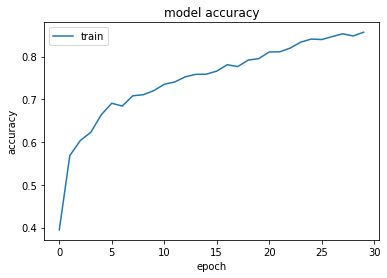

In [50]:
plt.plot(his.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()